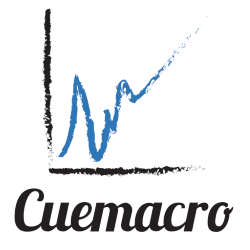

# Excel/xlwings with tcapy

**Saeed Amen / Founder of Cuemacro**

https://www.cuemacro.com / saeed@cuemacro.com / @saeedamenfx / All material is copyright Cuemacro / 2020

Look across any trading floor whether on the buy side or the sell side, it is likely you'll see folks using Excel. tcapy is as the name suggests written in Python. We can get Excel to talk to tcapy, using xlwings. [xlwings](https://www.xlwings.org/) is an open source Python library that allows Excel to communicate with Python. There is an open source version which is bundled with tcapy, as well as a pro version. The pro version is especially useful if you regularly want to create new reports.

We've created a spreadsheet in the folder `tcapy\tcapy\excel\tcapy_xl.xlsx` to demonstrate show how you can use Excel to run Python. Alongside it is a Python script `tcapy_xl.py` which has a small amount of Python code that: 

* reads the inputs from Excel
    * trade data pasted by the user
    * ticker, start date, finish date etc.
* kicks off a TCA calculation
    * calculates slippage and market impact for every trade
    * creates charts showing the trades alongside market data
    * aggregates the metrics as bar charts and distribution plots
* dumps the output of the TCA calculation in Excel
    * table of trades with additional calculated fields like slippage
    * charts for aggregated output
* also creates a PDF report of the output
    * can be shared with colleagues
    
We are assuming that Excel is running on Windows. Whilst, there is a Mac edition of Excel, we have not tested any of the code on on Mac OS.

## Installing xlwings addin

We are assumed that users have installed tcapy on Windows and on WSL/Ubuntu (see [installation instructions](https://github.com/cuemacro/tcapy/blob/master/INSTALL.md)), with all the associated dependencies (ie. Anaconda all the Python libraries), as well as databases, Redis etc. We also assume that the WSL/Ubuntu backend has been started, ie. `restart_db.sh` and `restart_tcapy.sh` are running. This means that all the various databases, Redis have been started, and furthermore, the tcapy webserver has been kicked off, as well as Celery, which should be able to accept computation tasks from our spreadsheet.

Let's make make sure the xlwings addin is available in Excel. Assuming we have used Anaconda as our Python distribution for tcapy, we can start an Anaconda prompt. Then type in 

    conda activate py36tca
    xlwings addin install
    
This should copy xlwings addin folder to Excel. Check file `tcapy\batch_scripts\windows\installation\set_tcapy_env_vars.bat` and make sure the variable `EXCEL_PATH` is correct. You may need to change it depending on what version of Excel you installed.

## Running Excel for xlwings

Once the xlwings addin is installed, we can run Excel by running `tcapy\batch_scripts\windows\start_excel.bat`. This kicks up the `py36tca` conda environment (adding it to the path temporarily), before allowing Excel to run on top of it. If you start Excel without this script, you can sometimes encounter errors, which include failure to load up NumPy. You should see the xlwings addin on the Excel ribbon.

## tcapy_xl spreadsheet

We can then load up spreadsheet `tcapy\tcapy\excel\tcapy_xl.xlsx` in Excel. This has several tabs including:

* info 
    * describes the spreadsheet
* trade_df 
    * paste your own trade history (it has a list of test trades to try out tcapy)
    * change parameters of TCA calculation like start and finish dates
* trade_df_output 
    * tcapy dumps processed trades (with additional calculated fields like slippage)
* results 
    * tcapy dumps charts related to the TCA calculation
* xlwings.conf
    * has path to your Python Conda environment, which may need changing, if Anaconda is installed somewhere else

## Kick off tcapy calculation!

Once you have pasted your own trade data (or just used the demo test data), as well as changed the parameters as appropriate, such as the start/finish dates of your TCA calculation, you can click the `Run tcapy computation` button. This will kick off the Python code in `tcapy_xl.py` that will

* read in your parameters and trade data from Excel
* run the TCA calculation using tcapy
* push the output to Excel
    * augmented trade data to `trade_df_output`
    * charts to `results` - which will basically form a report

# Conclusion

We've given a description of how to use tcapy in Excel via xlwings and our `tcapy_xl.xlsx` spreadsheet. You can of course create more complicated spreadsheets/accompanying Python code (for example to look at trade/order data, not just trade data)